In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

In [2]:
data=pd.read_csv("Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data=data.drop("Id",axis=1)

In [5]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.shape

(150, 5)

In [7]:
## count the species present in species column

data.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Text(0.5, 1.0, 'Sepal Length v/s Sepal Width')

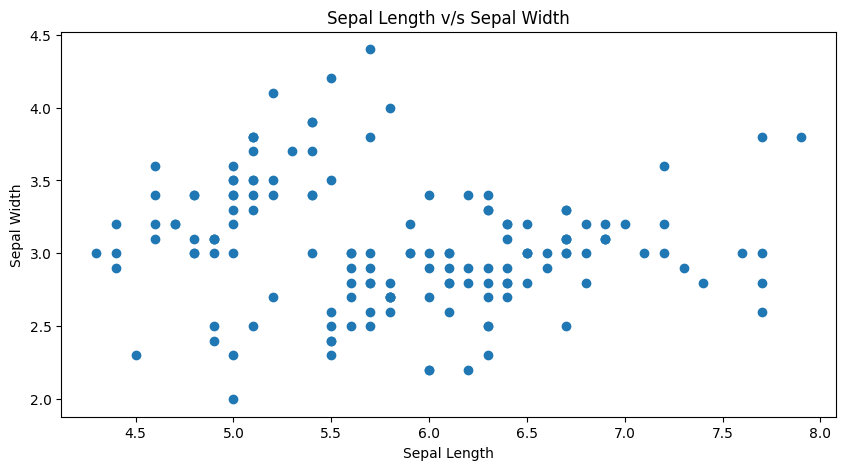

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length v/s Sepal Width')

Text(0.5, 1.0, 'Petal Length v/s Petal Width')

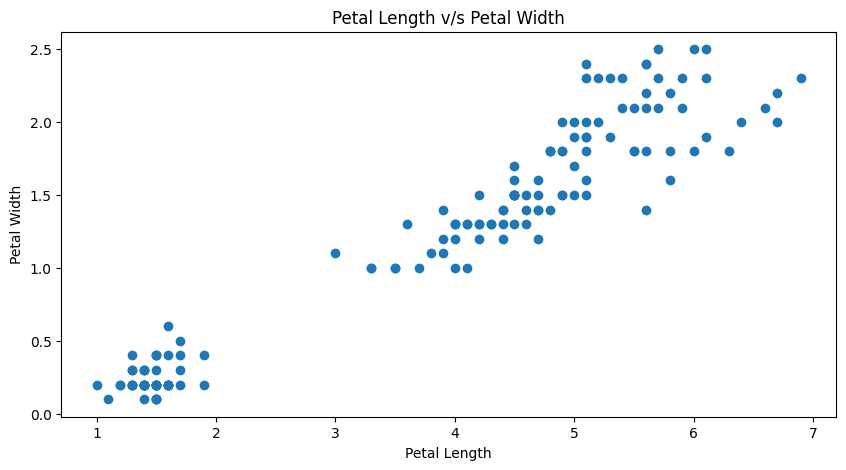

In [9]:
plt.figure(figsize=(10, 5))
plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'], marker='o')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length v/s Petal Width')

In [10]:
## checking the null values 
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
## converting species into label encoding

def map_Species(f):
    if f == 'Iris-setosa':
        f = 0
    elif f == 'Iris-versicolor':
        f = 1
    elif f == 'Iris-virginica':
        f = 2
    return f

In [13]:
data['Species'] = data.Species.map(map_Species)

In [14]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


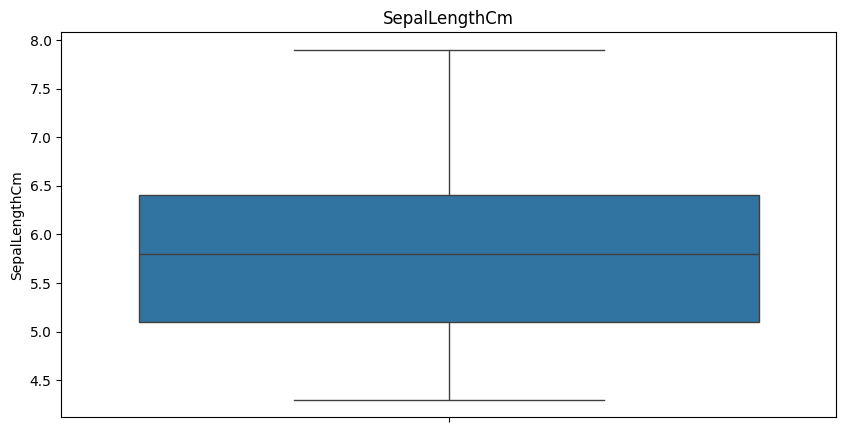

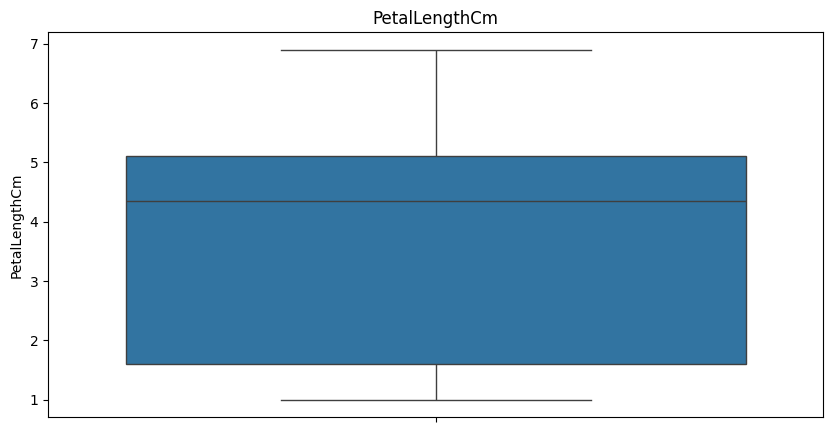

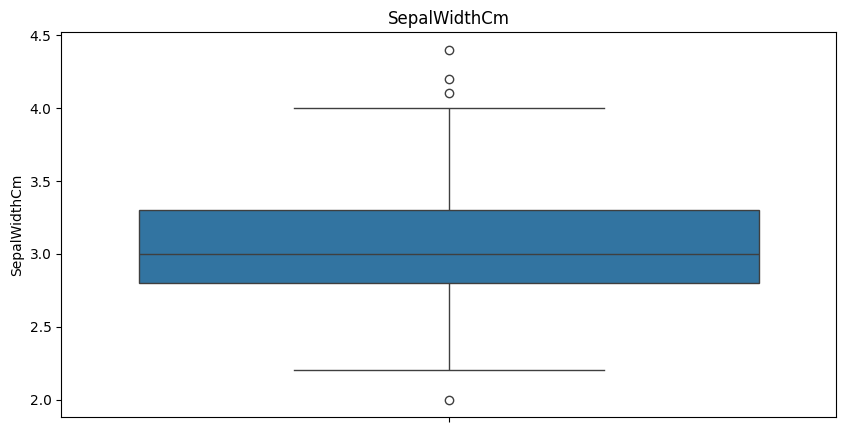

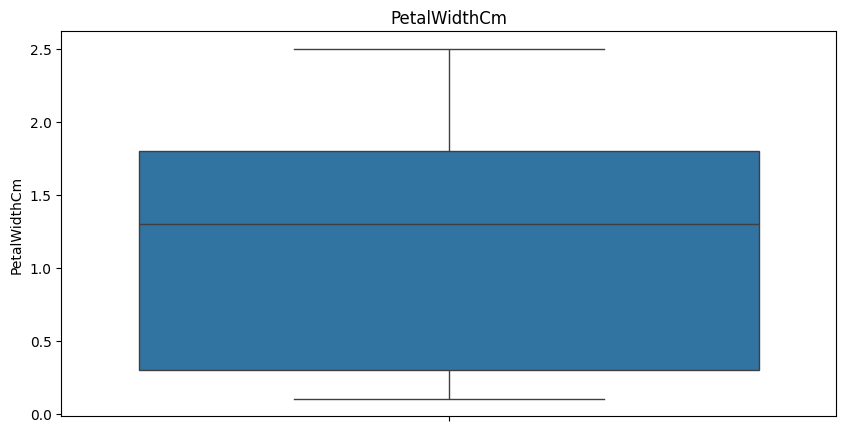

In [15]:
for f in ['SepalLengthCm', 'PetalLengthCm', 'SepalWidthCm', 'PetalWidthCm']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data[f])
    plt.title(f)

In [16]:
## independent and dependent features
X = data.iloc[:, :-1].values
y=data.iloc[:, -1].values

In [17]:
## preprocessing

sc = StandardScaler()
X = sc.fit_transform(X)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [20]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

--------------------------------------------Classification Report---------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

------------------------------------------Accuracy Score---------------------------------------------------------
1.0
--------------------------------------------Confustion Matrix-----------------------------------------------------


<Axes: >

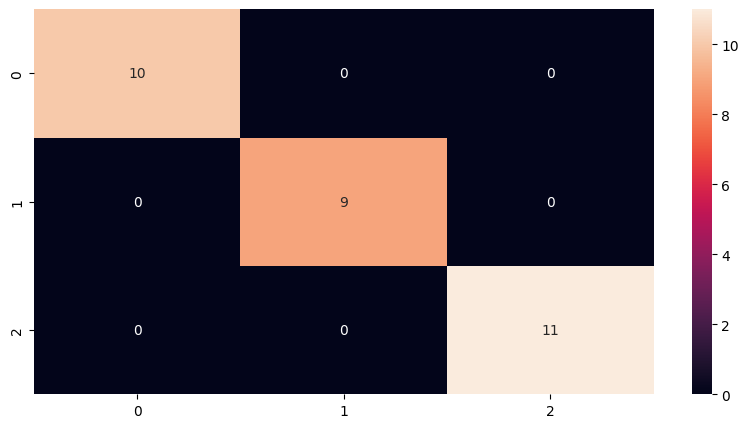

In [21]:
pred = lg.predict(X_test)
print("--------------------------------------------Classification Report---------------------------------------------")
print(classification_report(y_test, pred))

print("------------------------------------------Accuracy Score---------------------------------------------------------")
print(accuracy_score(y_test, pred))

print("--------------------------------------------Confustion Matrix-----------------------------------------------------")
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, pred), annot=True)

In [22]:
pd.DataFrame({'Actual': y_test, 'Predicted': pred}).head(50)

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1
